<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/main/Phase05/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /content/ham
!unrar x "/content/drive/MyDrive/Mohaymen/Phase05/HAM2.rar" "/content/ham"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Mohaymen/Phase05/HAM2.rar

Creating    /content/ham/HAM2                                         OK
Creating    /content/ham/HAM2/1996                                    OK
Extracting  /content/ham/HAM2/1996/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/1997                                    OK
Extracting  /content/ham/HAM2/1997/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/1998                                    OK
Extracting  /content/ham/HAM2/1998/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/1999                                    OK
Extracting  /content/ham/HAM2/1999/hamshahri.dtd                           0%  OK 
Creating    /content/ham/HAM2/2000                                    OK
Extracting  /content/ham/HAM2/2000/hamshahri.dtd           

In [ ]:
# !rm -r "/content/ham"

rm: cannot remove '/content/ham': No such file or directory


In [ ]:
# import os
# original_path = '/content/ham/HAM2'
# directories = os.listdir(original_path)
# files = list()
# index = 0
# for dir in directories:
#   path = original_path + '/' + dir
#   files = os.listdir(path)
#   for index, file in enumerate(files):
#     os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.csv'])))

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

data = pd.read_csv("/content/ham/HAM2/1996/0.csv", error_bad_lines=False)
data


In [ ]:
!rm -r /content/ham_csv

In [2]:
!mkdir "/content/ham_csv"
!mkdir "/content/ham_csv/HAM2"
!mkdir "/content/ham_csv/HAM2/1998"

In [3]:
from xml.etree import ElementTree as ET
import pandas as pd
import os

path = '/content/ham/HAM2/1998'
csv_path = '/content/ham_csv/HAM2/1998'
cnt = 0
df = pd.DataFrame()
files = os.listdir(path)
for index, file in enumerate(files):
  if "xml" not in file:
    continue
  try:
    tree = ET.parse(os.path.join(path, file))
  except Exception as err:
    print(file, err)
    continue
  root = tree.getroot()
  df2 = {}
  for doc in root:
    for child in doc:
      if child.tag == 'TEXT':
        df2['content'] = child.text
      if child.tag == 'TITLE':
        df2['title'] = child.text
      if child.tag == 'CAT' and child.items()[0][1] == 'fa':
        df2['category'] = child.text

    df2["year"] = "1998"
    df = df.append(df2, ignore_index=True)

df = df.replace('\n', '', regex=True)
df.to_csv(csv_path+"/"+str(0)+".csv")
df

,year,category,content,title
0,1998,NaN,NaN,NaN
1,1998,ادب و هنر,,آيا به سينما وفادار خواهندماند؟
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
4,1998,اجتماعی,,كداميك از استرس ها بيماري زاهستند؟
...,...,...,...,...
19958,1998,ورزش,,پس از يك دهه حضور موفق درپيرمرد دووميداني دوها...
19959,1998,ورزش,سومين همايش بزرگ فرهنگي ورزشي با ويلچر جانبازا...,همايش فرهنگي ورزشي جانبازان
19960,1998,ورزش,سرويس ورزشي: پيكارهاي جام جهاني تكواندو روز گذ...,جام جهاني تكواندو- آلمان خداداد و مقانلو بر حر...
19961,1998,ورزش,سرويس ورزشي: تيم ملي كشتي فرنگي دانشجويان ايرا...,كشتي دانشجويان جهان - تركيه تيم فرنگي سوم شد، ...


In [4]:
data = pd.read_csv("/content/ham_csv/HAM2/1998/0.csv")

In [5]:
data

,Unnamed: 0,year,category,content,title
0,0,1998,NaN,NaN,NaN
1,1,1998,ادب و هنر,NaN,آيا به سينما وفادار خواهندماند؟
2,2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
4,4,1998,اجتماعی,NaN,كداميك از استرس ها بيماري زاهستند؟
...,...,...,...,...,...
19958,19958,1998,ورزش,NaN,پس از يك دهه حضور موفق درپيرمرد دووميداني دوها...
19959,19959,1998,ورزش,سومين همايش بزرگ فرهنگي ورزشي با ويلچر جانبازا...,همايش فرهنگي ورزشي جانبازان
19960,19960,1998,ورزش,سرويس ورزشي: پيكارهاي جام جهاني تكواندو روز گذ...,جام جهاني تكواندو- آلمان خداداد و مقانلو بر حر...
19961,19961,1998,ورزش,سرويس ورزشي: تيم ملي كشتي فرنگي دانشجويان ايرا...,كشتي دانشجويان جهان - تركيه تيم فرنگي سوم شد، ...


In [ ]:
# data = df.copy(deep=True)

In [21]:
data = data[data["content"].str.len() > 4]

In [22]:
# data[data["content"].str.len() > 4]
data.head()

,year,category,content,title
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...


In [23]:
column = ['سیاسی', 'ورزش', 'اقتصاد', 'علمی فرهنگی', 'اجتماعی', 'ادب و هنر']
data = data.loc[data['category'].isin(column)]

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [25]:
data.head()

,year,category,content,title
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...


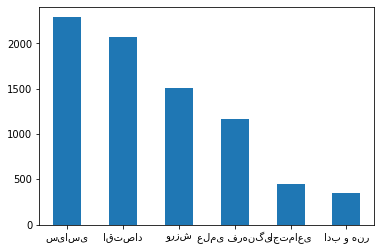

In [26]:
data['category'].value_counts().plot.bar(rot=0)

In [27]:
data['category'].value_counts()

سیاسی          2287
اقتصاد         2072
ورزش           1506
علمی فرهنگی    1169
اجتماعی         452
ادب و هنر       349
Name: category, dtype: int64

In [12]:
import string
string.whitespace
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [13]:
!pip install parsivar 
!pip install hazm

     |████████████████████████████████| 36.2 MB 51 kB/s 
     |████████████████████████████████| 1.5 MB 40.6 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=a4d86c74c203ddfac122432a9cb797c5255b1df2fe45f78cdaee3a91253bf077
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449920 sha256=1120966d3a56397441ce6a66f1fb3b6204dc6b6adefb930d234433104beb5000
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 316 kB 4.2 MB/s 
     |████████████████████████████████| 233 kB 41.0 MB/s 
     |████████████████████████████████| 1.4 MB 19.7 MB/s 
  Created wheel 

# Data preprocessing

In [14]:
import re
from parsivar import Normalizer, Tokenizer, FindStems
def preprocessing(content, stopword):
  content = re.sub("گروه اجتماعي:", "", content)
  content = re.sub("گروه سياسي:", "", content)
  content = re.sub("واحد رسانه هاي خارجي:", "", content)
  content = re.sub("گروه ادب و هنر:", "", content)
  content = re.sub("گروه علمي فرهنگي:", "", content)
  content = re.sub("گروه ورزشي:", "", content)
  content = re.sub("گروه اقتصادي:", "", content)

  content = filter(lambda ch: ch in string.whitespace or ch not in string.printable, content)
  content = ''.join(ch for ch in list(content))

  normalizer = Normalizer()
  content = normalizer.normalize(content)

  tokenizer = Tokenizer()
  words = tokenizer.tokenize_words(content)

  words_without_stopword = filter(lambda ch: ch not in stopwords, words)
  words_without_stopwords = list(words_without_stopword)

  stemmer = FindStems()
  content = list()
  for word in words_without_stopwords:
    content.append(stemmer.convert_to_stem(word))
  
  content = ' '.join(content)
  
  return content



In [15]:
!pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.2-py3-none-any.whl size=18398 sha256=b62ace6a062060415c13612a0888206a06bbf73bd63e61be53cff722ac18b728
  Stored in directory: /root/.cache/pip/wheels/b5/6d/51/9ece2eaf007ea3f7fb0ce053c5773b2eb0d308887da3af12c1
Successfully built pandarallel


In [16]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [17]:
file = open("/content/drive/MyDrive/Mohaymen/Phase05/stopwords.txt")
stopwords = file.read().splitlines()
file.close()

In [28]:
data["new_content"] = data['content'].parallel_apply(lambda content: preprocessing(content, stopwords))

In [29]:
data.head()

,year,category,content,title,new_content
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


In [30]:
!pip install wordcloud-fa

     |████████████████████████████████| 76 kB 2.6 MB/s 
     |████████████████████████████████| 364 kB 8.9 MB/s 
  Created wheel for wordcloud-fa: filename=wordcloud_fa-0.1.8-py3-none-any.whl size=71015 sha256=300f8b1a3cc2c6612af9ec0e0aeca5bf6985897ccd92a52550c04916739f24c7
  Stored in directory: /root/.cache/pip/wheels/ae/a0/f3/81d930500493324929d26658e5a3ccff5ccc8644131ad1aadc
Successfully built wordcloud-fa
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud_fa import WordCloudFa

In [32]:
data[data["category"] == "ورزش"]

,year,category,content,title,new_content
60,1998,ورزش,سرويس ورزشي: تورنمنت چهار جانبه تهران روزگذشته...,فوتبال جام آزادگان به كجامي رود؟!,سرویس ورزشی تورنمنت جانبه تهران روزگذشته آغازش...
62,1998,ورزش,سرويس ورزشي: در ادامه مسابقه هاي فوتبال قهرمان...,فوتبال جام آزادگان سپاهان وفجر سپاسي حريفان خو...,سرویس ورزشی ادامه مسابقه فوتبال قهرمانی دسته ب...
90,1998,ورزش,"گروه ورزشي: ""ميكائيل مادار"" مهاجم ملي پوش سابق...",ميكائيل مادار به پاري سن ژرمن پيوست,میکائیل مادار مهاجم ملی پوشید&پوش تیم ملی فوتب...
91,1998,ورزش,گروه ورزشي: به گزارش خبرگزاري آلمان، ديدار تيم...,بيش از 24 ميليون آلماني بازي تيم هاي فوتبال اي...,گزارش خبرگزاری آلمان دیدار تیم ملی فوتبال آلما...
129,1998,ورزش,تيم اميد و درسهاي تازه فوتبال,كادر مربيان تيم اميد با دانش فوتبال كامل مي شوند,تیم امید درس فوتبال
...,...,...,...,...,...
19906,1998,ورزش,سرويس ورزشي: مسابقه هاي انتخابي دانشجويان كشور...,رقابت هاي انتخابي شطرنج دانشجويان كشور,سرویس ورزشی مسابقه انتخابی دانشجو کشور اعزام م...
19907,1998,ورزش,حركت جدي تيم واليبال ايران در راه مسابقات قهرم...,با تجربه ها فراموش نشوند,حرکت جدی تیم والیبال ایران مسابقات قهرمانی جها...
19959,1998,ورزش,سومين همايش بزرگ فرهنگي ورزشي با ويلچر جانبازا...,همايش فرهنگي ورزشي جانبازان,سومین همایش فرهنگی ورزشی ویلچر جانباز همزمان س...
19960,1998,ورزش,سرويس ورزشي: پيكارهاي جام جهاني تكواندو روز گذ...,جام جهاني تكواندو- آلمان خداداد و مقانلو بر حر...,سرویس ورزشی پیکار جام جهانی تکواندو درآلمان آغ...


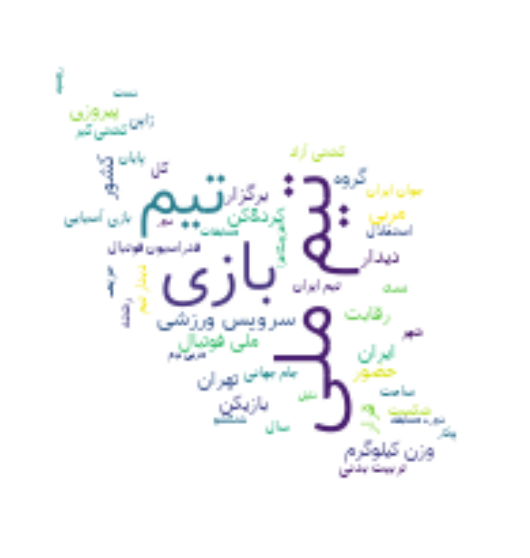

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sport_df = data[data["category"] == "ورزش"]
sport_content = ' '.join(content for content in sport_df["new_content"])
# print(sport_content)
mask_array = np.array(Image.open("/content/iran.png"))

wordcloud = WordCloudFa(mask=mask_array, background_color='white').generate(sport_content)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
data.to_pickle("/content/drive/MyDrive/Mohaymen/Phase05/data.pkl")

In [41]:
data = pd.read_pickle("/content/drive/MyDrive/Mohaymen/Phase05/data.pkl")

In [42]:
data.head()

,year,category,content,title,new_content
2,1998,ادب و هنر,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,ادب و هنر,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,علمی فرهنگی,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,علمی فرهنگی,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,علمی فرهنگی,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


# split test and train data

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['category'] = le.fit_transform(data['category'])

In [44]:
data.head()

,year,category,content,title,new_content
2,1998,1,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,1,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,4,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,4,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,4,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


In [45]:
print(le.inverse_transform([0, 1, 2, 3, 4, 5]))

['اجتماعی' 'ادب و هنر' 'اقتصاد' 'سیاسی' 'علمی فرهنگی' 'ورزش']


In [46]:
import torch
import torchtext

SEED = 100
torch.manual_seed(SEED)

In [48]:
X = data['new_content']
Y = data['category']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [52]:
train_data = pd.concat([X_train, y_train], axis=1)
valid_data = pd.concat([X_valid, y_valid], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [53]:
train_data.head()

,new_content,category
8269,بی‌نظیر بوتو رهبر مخالف دولت مجلس ملی پاکستان ...,3
2516,افزایش قیمت سهام شرکت شاخص قیمت سهام بورس واحد...,2
7201,دانشمند موفق ساخت واکسنی‌شده‌اندکه بروزعفونتها...,4
2229,منظور بزرگداشت هفته کتاب نمایشگاه فروشگاه دائم...,4
19634,گذشت&گذر اثر ادبیات امریکاجدیدترین کتاب نویسند...,1
